# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import osmnx as ox
from shapely.geometry import Point, Polygon
import contextily as ctx
from shapely.wkt import loads

# Loading the data into a dataframe

In [2]:
#Making a variable that is the path to the file
Path_CSV = "nypd-motor-vehicle-collisions.csv"

#Creating a dataframe for out data
df = pd.read_csv("nypd-motor-vehicle-collisions.csv")

#checking if it was loaded properly
df.info()

/tmp/ipykernel_22361/2484598805.py:5: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("nypd-motor-vehicle-collisions.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1612178 entries, 0 to 1612177
Data columns (total 29 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   ACCIDENT DATE                  1612178 non-null  object 
 1   ACCIDENT TIME                  1612178 non-null  object 
 2   BOROUGH                        1127553 non-null  object 
 3   ZIP CODE                       1127376 non-null  object 
 4   LATITUDE                       1415893 non-null  float64
 5   LONGITUDE                      1415893 non-null  float64
 6   LOCATION                       1415893 non-null  object 
 7   ON STREET NAME                 1298002 non-null  object 
 8   CROSS STREET NAME              1079193 non-null  object 
 9   OFF STREET NAME                219732 non-null   object 
 10  NUMBER OF PERSONS INJURED      1612161 non-null  float64
 11  NUMBER OF PERSONS KILLED       1612145 non-null  float64
 12  NUMBER OF PEDE

In [3]:
#now only making sure to use the column that we will need for our analysis
df = pd.read_csv(
    Path_CSV,
    usecols=[
        "BOROUGH",
        "CONTRIBUTING FACTOR VEHICLE 1",
        "CONTRIBUTING FACTOR VEHICLE 2",
        "CONTRIBUTING FACTOR VEHICLE 3",
        "CONTRIBUTING FACTOR VEHICLE 4",
        "CONTRIBUTING FACTOR VEHICLE 5",
        "NUMBER OF PERSONS INJURED",
        "NUMBER OF PERSONS KILLED",
        "NUMBER OF PEDESTRIANS INJURED",
        "NUMBER OF PEDESTRIANS KILLED",
        "NUMBER OF CYCLIST INJURED",
        "NUMBER OF CYCLIST KILLED",
        "NUMBER OF MOTORIST INJURED",
        "NUMBER OF MOTORIST KILLED",
        "COLLISION_ID",
        "VEHICLE TYPE CODE 1",
        "VEHICLE TYPE CODE 2",
        "VEHICLE TYPE CODE 3",
        "VEHICLE TYPE CODE 4",
        "VEHICLE TYPE CODE 5",
        "ON STREET NAME",
        "CROSS STREET NAME",
        "LOCATION",
        "LATITUDE",
        "LONGITUDE"
    ],
    dtype={
        "BOROUGH": "object",
        "CONTRIBUTING FACTOR VEHICLE 1": "object",
        "CONTRIBUTING FACTOR VEHICLE 2": "object",
        "CONTRIBUTING FACTOR VEHICLE 3": "object",
        "CONTRIBUTING FACTOR VEHICLE 4": "object",
        "CONTRIBUTING FACTOR VEHICLE 5": "object",
        "NUMBER OF PERSONS INJURED": "float64",
        "NUMBER OF PERSONS KILLED": "float64",
        "NUMBER OF PEDESTRIANS INJURED": "float64",
        "NUMBER OF PEDESTRIANS KILLED": "float64",
        "NUMBER OF CYCLIST INJURED": "float64",
        "NUMBER OF CYCLIST KILLED": "float64",
        "NUMBER OF MOTORIST INJURED": "float64",
        "NUMBER OF MOTORIST KILLED": "float64",
        "COLLISION_ID": "int64",
        "VEHICLE TYPE CODE 1": "object",
        "VEHICLE TYPE CODE 2": "object",
        "VEHICLE TYPE CODE 3": "object",
        "VEHICLE TYPE CODE 4": "object",
        "VEHICLE TYPE CODE 5": "object",
        "ON STREET NAME": "object",
        "CROSS STREET NAME": "object",
        "LOCATION": "object",
        "LATITUDE": "float64",
        "LONGITUDE":  "float64"
    }
)

#checking if our changes were implemented properly
df.head()

,BOROUGH,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,QUEENS,40.676052,-73.790184,"{'type': 'Point', 'coordinates': [-73.790184, ...",NaN,NaN,0.0,0.0,0.0,0.0,...,Unspecified,NaN,NaN,NaN,4184637,Sedan,Pick-up Truck,NaN,NaN,NaN
1,BROOKLYN,40.657780,-73.951096,"{'type': 'Point', 'coordinates': [-73.951096, ...",NaN,NaN,0.0,0.0,0.0,0.0,...,Unspecified,NaN,NaN,NaN,4195773,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
2,MANHATTAN,40.718143,-73.993835,"{'type': 'Point', 'coordinates': [-73.993835, ...",CHRYSTIE STREET,GRAND STREET,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,4202457,Sedan,NaN,NaN,NaN,NaN
3,BRONX,40.840534,-73.866610,"{'type': 'Point', 'coordinates': [-73.86661, 4...",NaN,NaN,0.0,0.0,0.0,0.0,...,Unspecified,NaN,NaN,NaN,4198749,Taxi,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
4,MANHATTAN,40.745440,-73.975400,"{'type': 'Point', 'coordinates': [-73.9754, 40...",EAST 35 STREET,2 AVENUE,1.0,0.0,0.0,0.0,...,Driver Inattention/Distraction,NaN,NaN,NaN,4183798,Station Wagon/Sport Utility Vehicle,Bike,NaN,NaN,NaN


# Data verification

## Now I will verify the boroughs 

In [4]:
#Creating an array to see what unique boroughs we have
unique_boroughs = df['BOROUGH'].unique()

unique_boroughs

array(['QUEENS', 'BROOKLYN', 'MANHATTAN', 'BRONX', nan, 'STATEN ISLAND'],
      dtype=object)

### There are some rows without boroughs, now I will verify how much

In [5]:
#Creating an DF and seeing how many rows have blanks for boroughs
NaN_Boroughs = df[df['BOROUGH'].isna()]
#now creating a variable that will show the percent of empty boroughs
Perenct_of_empty_boroughs = len(NaN_Boroughs)/len(df)

#Printing the reults
print(f"this is the empty Boroughs: {len(NaN_Boroughs)}")
print(f"this is all rows with Boroughs: {len(df)}")
print(f"this the percent of rows without any Boroughs: {Perenct_of_empty_boroughs:.0%}")


this is the empty Boroughs: 484625
this is all rows with Boroughs: 1612178
this the percent of rows without any Boroughs: 30%


### I will remove the rows without boroughs

In [6]:
df = df.dropna(subset=['BOROUGH'])

### Now we need to make sure that all srtings in this data frame are uppercase

In [7]:
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.upper()

df.head(4)

,BOROUGH,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,QUEENS,40.676052,-73.790184,"{'TYPE': 'POINT', 'COORDINATES': [-73.790184, ...",NaN,NaN,0.0,0.0,0.0,0.0,...,UNSPECIFIED,NaN,NaN,NaN,4184637,SEDAN,PICK-UP TRUCK,NaN,NaN,NaN
1,BROOKLYN,40.657780,-73.951096,"{'TYPE': 'POINT', 'COORDINATES': [-73.951096, ...",NaN,NaN,0.0,0.0,0.0,0.0,...,UNSPECIFIED,NaN,NaN,NaN,4195773,STATION WAGON/SPORT UTILITY VEHICLE,STATION WAGON/SPORT UTILITY VEHICLE,NaN,NaN,NaN
2,MANHATTAN,40.718143,-73.993835,"{'TYPE': 'POINT', 'COORDINATES': [-73.993835, ...",CHRYSTIE STREET,GRAND STREET,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,4202457,SEDAN,NaN,NaN,NaN,NaN
3,BRONX,40.840534,-73.866610,"{'TYPE': 'POINT', 'COORDINATES': [-73.86661, 4...",NaN,NaN,0.0,0.0,0.0,0.0,...,UNSPECIFIED,NaN,NaN,NaN,4198749,TAXI,STATION WAGON/SPORT UTILITY VEHICLE,NaN,NaN,NaN


### To make sure that we are not duplicating collions we will drop the duplicates 

In [8]:
#Saving a copy of the df so that we can see the before and after
original_df = df.copy()
df_causes = df.drop_duplicates(subset='COLLISION_ID')


print(f"unique IDs:{len(df)}")
print(f"all IDs:{len(original_df)}")
print(f"duplicate IDs:{len(original_df)-len(df)}")

unique IDs:1127553
all IDs:1127553
duplicate IDs:0


### Summing up the number of people injured and killed so it is easier to analize

In [9]:
df['TOTAL_KILLED'] = (
    df['NUMBER OF PERSONS KILLED'] +
    df['NUMBER OF PEDESTRIANS KILLED'] +
    df['NUMBER OF CYCLIST KILLED'] +
    df['NUMBER OF MOTORIST KILLED']
)

df['TOTAL_INJURED'] = (
    df['NUMBER OF PERSONS INJURED'] +
    df['NUMBER OF PEDESTRIANS INJURED'] +
    df['NUMBER OF CYCLIST INJURED'] +
    df['NUMBER OF MOTORIST INJURED']
)

#now we will combine the Tota;l injured and killed columns to determine the most dangerous causes

df['TOTAL_KILLED/INJURED'] = (
    df['TOTAL_KILLED'] +
    df['TOTAL_INJURED']
)

#checking if was combined correctly
df.head(10)

,BOROUGH,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,...,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,TOTAL_KILLED,TOTAL_INJURED,TOTAL_KILLED/INJURED
0,QUEENS,40.676052,-73.790184,"{'TYPE': 'POINT', 'COORDINATES': [-73.790184, ...",NaN,NaN,0.0,0.0,0.0,0.0,...,NaN,4184637,SEDAN,PICK-UP TRUCK,NaN,NaN,NaN,0.0,0.0,0.0
1,BROOKLYN,40.657780,-73.951096,"{'TYPE': 'POINT', 'COORDINATES': [-73.951096, ...",NaN,NaN,0.0,0.0,0.0,0.0,...,NaN,4195773,STATION WAGON/SPORT UTILITY VEHICLE,STATION WAGON/SPORT UTILITY VEHICLE,NaN,NaN,NaN,0.0,0.0,0.0
2,MANHATTAN,40.718143,-73.993835,"{'TYPE': 'POINT', 'COORDINATES': [-73.993835, ...",CHRYSTIE STREET,GRAND STREET,1.0,0.0,0.0,0.0,...,NaN,4202457,SEDAN,NaN,NaN,NaN,NaN,0.0,2.0,2.0
3,BRONX,40.840534,-73.866610,"{'TYPE': 'POINT', 'COORDINATES': [-73.86661, 4...",NaN,NaN,0.0,0.0,0.0,0.0,...,NaN,4198749,TAXI,STATION WAGON/SPORT UTILITY VEHICLE,NaN,NaN,NaN,0.0,0.0,0.0
4,MANHATTAN,40.745440,-73.975400,"{'TYPE': 'POINT', 'COORDINATES': [-73.9754, 40...",EAST 35 STREET,2 AVENUE,1.0,0.0,0.0,0.0,...,NaN,4183798,STATION WAGON/SPORT UTILITY VEHICLE,BIKE,NaN,NaN,NaN,0.0,2.0,2.0
5,BROOKLYN,40.726524,-73.946390,"{'TYPE': 'POINT', 'COORDINATES': [-73.94639, 4...",NaN,NaN,1.0,0.0,0.0,0.0,...,NaN,4196772,STATION WAGON/SPORT UTILITY VEHICLE,BIKE,NaN,NaN,NaN,0.0,2.0,2.0
6,QUEENS,40.667522,-73.780630,"{'TYPE': 'POINT', 'COORDINATES': [-73.78063, 4...",ROCKAWAY BOULEVARD,NORTH CONDUIT AVENUE,0.0,0.0,0.0,0.0,...,NaN,4198571,SEDAN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
8,QUEENS,40.666492,-73.765360,"{'TYPE': 'POINT', 'COORDINATES': [-73.76536, 4...",SOUTH CONDUIT AVENUE,179 STREET,0.0,0.0,0.0,0.0,...,NaN,4181743,PICK-UP TRUCK,PICK-UP TRUCK,NaN,NaN,NaN,0.0,0.0,0.0
9,BRONX,40.837720,-73.927630,"{'TYPE': 'POINT', 'COORDINATES': [-73.92763, 4...",WEST 167 STREET,UNIVERSITY AVENUE,0.0,0.0,0.0,0.0,...,NaN,4198173,SEDAN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
10,BROOKLYN,40.681640,-73.985680,"{'TYPE': 'POINT', 'COORDINATES': [-73.98568, 4...",NEVINS STREET,BUTLER STREET,1.0,0.0,0.0,0.0,...,NaN,4192620,STATION WAGON/SPORT UTILITY VEHICLE,BIKE,NaN,NaN,NaN,0.0,2.0,2.0


### Creating a df that will combining the factor columns so that we could take into concideration all of the factors in our analysys

In [10]:
#Melting all the factor columns into one variable
df_causes = df.melt(
    id_vars=['BOROUGH', 'TOTAL_KILLED', 'TOTAL_INJURED','TOTAL_KILLED/INJURED'],
    value_vars=[
        'CONTRIBUTING FACTOR VEHICLE 1',
        'CONTRIBUTING FACTOR VEHICLE 2',
        'CONTRIBUTING FACTOR VEHICLE 3',
        'CONTRIBUTING FACTOR VEHICLE 4',
        'CONTRIBUTING FACTOR VEHICLE 5'
    ],
    var_name='vehicle_number',
    value_name='accident_cause'
)

#Removing blank lines from both the causes and boroughs for our analysis
df_causes = df_causes.dropna(subset=['accident_cause'])
#checking if was combined correctly
df_causes.head(10)

,BOROUGH,TOTAL_KILLED,TOTAL_INJURED,TOTAL_KILLED/INJURED,vehicle_number,accident_cause
0,QUEENS,0.0,0.0,0.0,CONTRIBUTING FACTOR VEHICLE 1,PASSING TOO CLOSELY
1,BROOKLYN,0.0,0.0,0.0,CONTRIBUTING FACTOR VEHICLE 1,PASSING TOO CLOSELY
2,MANHATTAN,0.0,2.0,2.0,CONTRIBUTING FACTOR VEHICLE 1,DRIVER INATTENTION/DISTRACTION
3,BRONX,0.0,0.0,0.0,CONTRIBUTING FACTOR VEHICLE 1,UNSPECIFIED
4,MANHATTAN,0.0,2.0,2.0,CONTRIBUTING FACTOR VEHICLE 1,DRIVER INATTENTION/DISTRACTION
5,BROOKLYN,0.0,2.0,2.0,CONTRIBUTING FACTOR VEHICLE 1,UNSPECIFIED
6,QUEENS,0.0,0.0,0.0,CONTRIBUTING FACTOR VEHICLE 1,UNSPECIFIED
7,QUEENS,0.0,0.0,0.0,CONTRIBUTING FACTOR VEHICLE 1,REACTION TO UNINVOLVED VEHICLE
8,BRONX,0.0,0.0,0.0,CONTRIBUTING FACTOR VEHICLE 1,UNSPECIFIED
9,BROOKLYN,0.0,2.0,2.0,CONTRIBUTING FACTOR VEHICLE 1,FOLLOWING TOO CLOSELY


### Checking what causes we have

In [11]:
# Transfering the data in the 'accident_cause' series to a list for analysis
Deadliest_Cause_Borough_list = df_causes['accident_cause'].unique().tolist()


Deadliest_Cause_Borough_list

['PASSING TOO CLOSELY',
 'DRIVER INATTENTION/DISTRACTION',
 'UNSPECIFIED',
 'REACTION TO UNINVOLVED VEHICLE',
 'FOLLOWING TOO CLOSELY',
 'PASSING OR LANE USAGE IMPROPER',
 'VIEW OBSTRUCTED/LIMITED',
 'AGGRESSIVE DRIVING/ROAD RAGE',
 'OTHER VEHICULAR',
 'DRIVERLESS/RUNAWAY VEHICLE',
 'TURNING IMPROPERLY',
 'FAILURE TO YIELD RIGHT-OF-WAY',
 'BACKING UNSAFELY',
 'BRAKES DEFECTIVE',
 'UNSAFE LANE CHANGING',
 'PAVEMENT DEFECTIVE',
 'TRAFFIC CONTROL DISREGARDED',
 'TIRE FAILURE/INADEQUATE',
 'OBSTRUCTION/DEBRIS',
 'UNSAFE SPEED',
 'ALCOHOL INVOLVEMENT',
 'DRIVER INEXPERIENCE',
 'PAVEMENT SLIPPERY',
 'PEDESTRIAN/BICYCLIST/OTHER PEDESTRIAN ERROR/CONFUSION',
 'PASSENGER DISTRACTION',
 'OVERSIZED VEHICLE',
 'FAILURE TO KEEP RIGHT',
 'STEERING FAILURE',
 'GLARE',
 'OUTSIDE CAR DISTRACTION',
 'DRUGS (ILLEGAL)',
 'FELL ASLEEP',
 'PHYSICAL DISABILITY',
 'ILLNES',
 'ANIMALS ACTION',
 'FATIGUED/DROWSY',
 'OTHER LIGHTING DEFECTS',
 'LOST CONSCIOUSNESS',
 'ACCELERATOR DEFECTIVE',
 'TOW HITCH DEFECTIVE',

In [12]:
#Identifed the following undesired causes "80", "1",'OTHER VEHICULAR' and "Unidentifed"
Causes_to_remove = ['80', '1','UNSPECIFIED','OTHER VEHICULAR']
# Now preceeding to remove them from the data frame 
df_causes = df_causes[~df_causes['accident_cause'].isin(Causes_to_remove)]

#once again checking what causes we have
Deadliest_Cause_Borough_list = df_causes['accident_cause'].unique().tolist()


Deadliest_Cause_Borough_list

['PASSING TOO CLOSELY',
 'DRIVER INATTENTION/DISTRACTION',
 'REACTION TO UNINVOLVED VEHICLE',
 'FOLLOWING TOO CLOSELY',
 'PASSING OR LANE USAGE IMPROPER',
 'VIEW OBSTRUCTED/LIMITED',
 'AGGRESSIVE DRIVING/ROAD RAGE',
 'DRIVERLESS/RUNAWAY VEHICLE',
 'TURNING IMPROPERLY',
 'FAILURE TO YIELD RIGHT-OF-WAY',
 'BACKING UNSAFELY',
 'BRAKES DEFECTIVE',
 'UNSAFE LANE CHANGING',
 'PAVEMENT DEFECTIVE',
 'TRAFFIC CONTROL DISREGARDED',
 'TIRE FAILURE/INADEQUATE',
 'OBSTRUCTION/DEBRIS',
 'UNSAFE SPEED',
 'ALCOHOL INVOLVEMENT',
 'DRIVER INEXPERIENCE',
 'PAVEMENT SLIPPERY',
 'PEDESTRIAN/BICYCLIST/OTHER PEDESTRIAN ERROR/CONFUSION',
 'PASSENGER DISTRACTION',
 'OVERSIZED VEHICLE',
 'FAILURE TO KEEP RIGHT',
 'STEERING FAILURE',
 'GLARE',
 'OUTSIDE CAR DISTRACTION',
 'DRUGS (ILLEGAL)',
 'FELL ASLEEP',
 'PHYSICAL DISABILITY',
 'ILLNES',
 'ANIMALS ACTION',
 'FATIGUED/DROWSY',
 'OTHER LIGHTING DEFECTS',
 'LOST CONSCIOUSNESS',
 'ACCELERATOR DEFECTIVE',
 'TOW HITCH DEFECTIVE',
 'VEHICLE VANDALISM',
 'OTHER ELECT

# Data Analysis

## 1.Identification of the most dangerous accident factors in each borough of New York City.

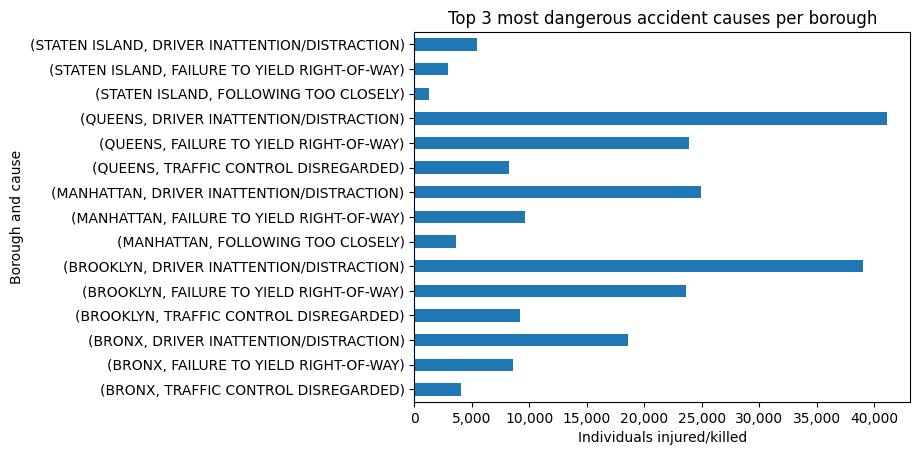

In [13]:
# Setting up the dataframe to sum the 'TOTAL_KILLED/INJURED' by accident_cause per borough
First_Analysis = (
    df_causes.groupby(['BOROUGH', 'accident_cause'])['TOTAL_KILLED/INJURED']
    .sum()
    .groupby(level=0, group_keys=False)  # Group by BOROUGH again
    .nlargest(3)  # Keep top 3 causes per borough
)

# Sorting within each borough before plotting
First_Analysis = First_Analysis.reset_index() 
First_Analysis = First_Analysis.sort_values(['BOROUGH', 'TOTAL_KILLED/INJURED'], ascending=[True, True])  # Sort within each borough

# Visualizing it with a horizontal bar chart
First_Analysis.set_index(['BOROUGH', 'accident_cause'])['TOTAL_KILLED/INJURED'].plot(kind='barh')

# Setting up the labels and titles
plt.xlabel('Individuals injured/killed')
plt.ylabel('Borough and cause')
plt.title('Top 3 most dangerous accident causes per borough')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Displaying the bar chart
plt.show()

## 2. Presentation of the number of fatalities and injuries caused by speeding in each borough.

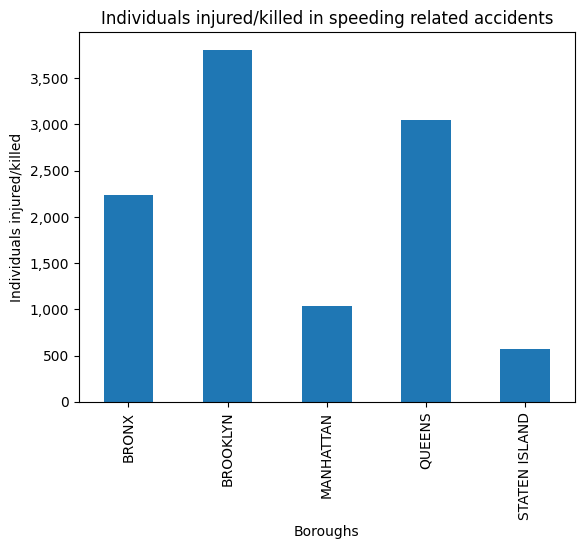

In [14]:
# Setting up the dataframe to only have the speeding cases
df_Speeding_cases = df_causes[df_causes['accident_cause'] == "UNSAFE SPEED"]

# Setting up the dataframe to sum the 'TOTAL_KILLED/INJURED' by aper borough
Second_Analysis = (
    df_Speeding_cases
    .groupby(['BOROUGH'])['TOTAL_KILLED/INJURED']
    .sum()
    .groupby(level=0, group_keys=False)  # Group by BOROUGH again
    .nlargest(3)  # Keep top 3 causes per borough
)

# Visualizing it with a bar chart
Second_Analysis.plot(kind='bar')

# Setting up the labels and titles
plt.xlabel('Boroughs')
plt.ylabel('Individuals injured/killed')
plt.title('Individuals injured/killed in speeding related accidents')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Displaying the bar chart
plt.show()

## 3,1.Identification of the three most common accident factors, broken down by borough

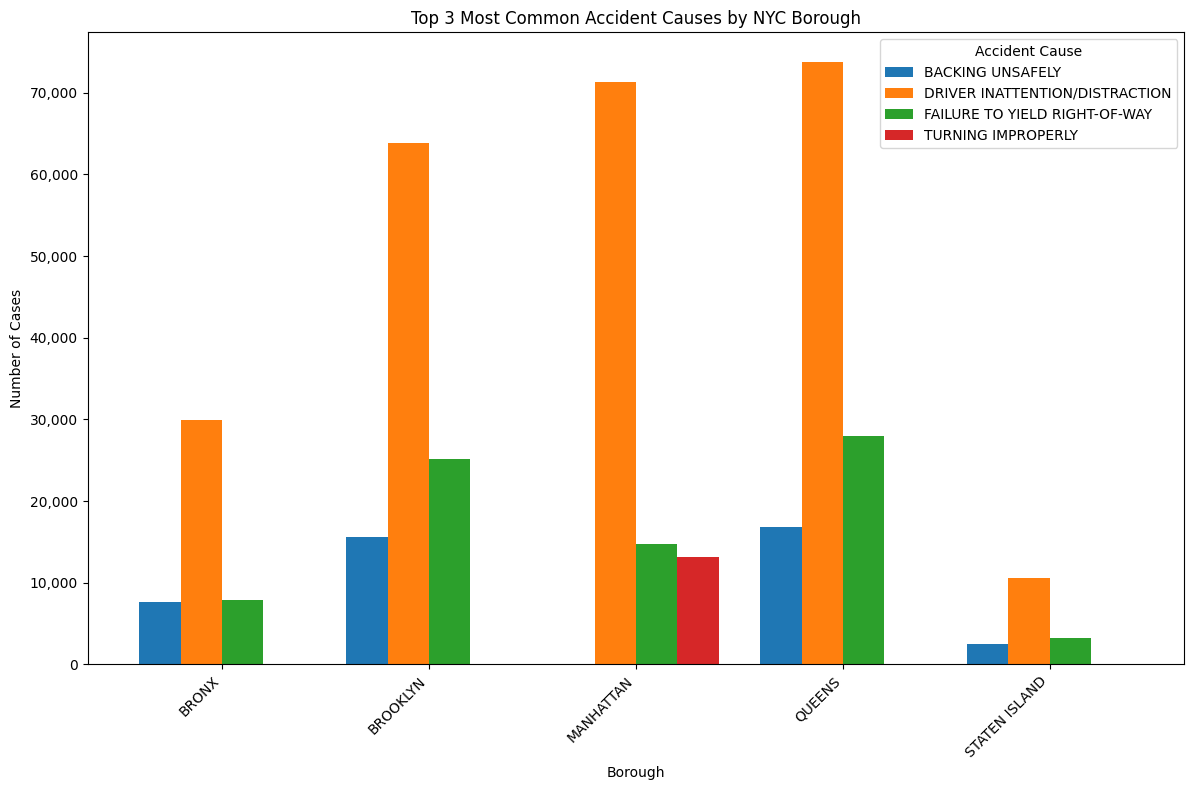

In [16]:
# Grouping by BOROUGH and accident_cause to calculate the total count
Third_Analysis_v1 = (
    df_causes.groupby(['BOROUGH', 'accident_cause'])
    .size()  # Count occurrences of each cause per borough
    .reset_index(name='TOTAL_COUNT')  # Rename the count column
)

# Keeping only the top 3 causes per borough
Third_Analysis_v1 = (
    Third_Analysis_v1.sort_values(['BOROUGH', 'TOTAL_COUNT'], ascending=[True, False])
    .groupby('BOROUGH')
    .head(3) 
)

# Pivoting the data for clustered bar chart
pivot_data = Third_Analysis_v1.pivot(index='BOROUGH', columns='accident_cause', values='TOTAL_COUNT').fillna(0)

# Creating the  bar chart
ax = pivot_data.plot(kind='bar', figsize=(12, 8), width=0.8)

# Customizing the bar chart
plt.xlabel('Borough')
plt.ylabel('Number of Cases')
plt.title('Top 3 Most Common Accident Causes by NYC Borough')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Accident Cause')
plt.tight_layout()
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))
# Displaying the bar chart
plt.show()


## 3,2.Identification of the three most common accident factors for the entire city overall.

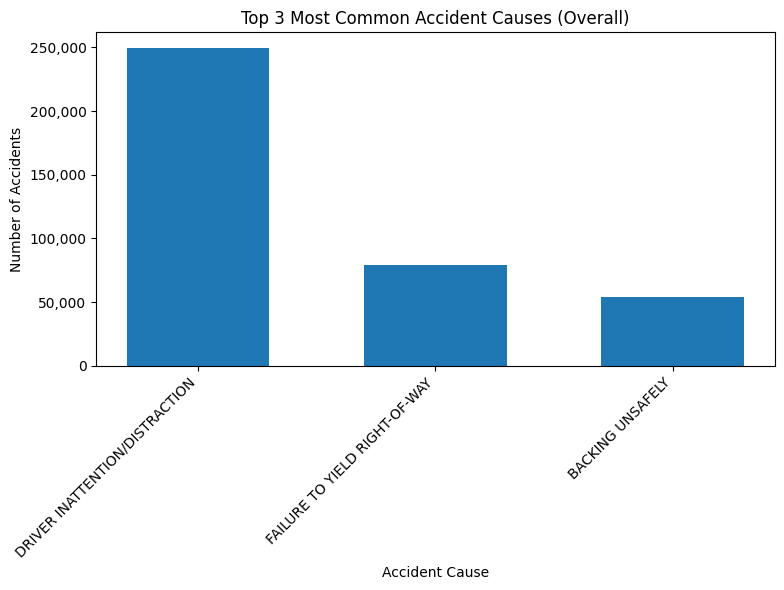

In [17]:
#Grouping by accident_cause to calculate the total count across the entire city
Third_Analysis_v2 = (
    df_causes.groupby('accident_cause')
    .size()  # Count occurrences of each cause
    .reset_index(name='TOTAL_COUNT')  # Rename the count column
)

# Keeping only the top 3 causes
Third_Analysis_v2 = Third_Analysis_v2.sort_values('TOTAL_COUNT', ascending=False).head(3)

# Creating the bar chart
plt.figure(figsize=(8, 6))
plt.bar(Third_Analysis_v2['accident_cause'], Third_Analysis_v2['TOTAL_COUNT'], width=0.6)

# Customizing the chart
plt.xlabel('Accident Cause')
plt.ylabel('Number of Accidents')
plt.title('Top 3 Most Common Accident Causes (Overall)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))
# Display the chart
plt.show()


## 4.Determination of the types of vehicles most frequently involved in accidents.

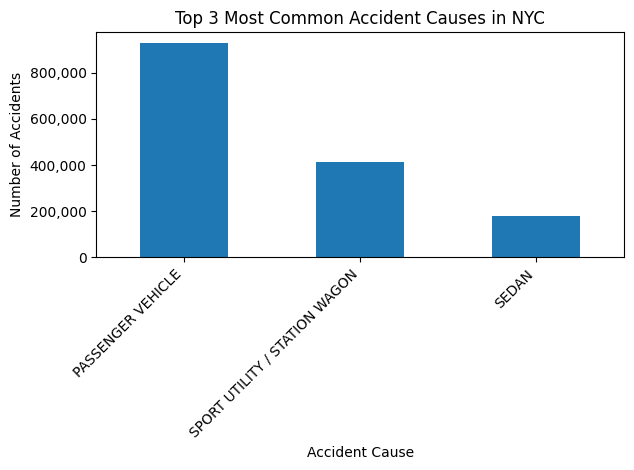

In [18]:
# Combining all the vehicle type columns into one column
df_VEHICLE_TYPE = df.melt(
    id_vars=['COLLISION_ID', 'BOROUGH', 'LATITUDE', 'LONGITUDE', 'LOCATION'],  # Keep columns that are not being melted
    value_vars=[
        'VEHICLE TYPE CODE 1',
        'VEHICLE TYPE CODE 2',
        'VEHICLE TYPE CODE 3',
        'VEHICLE TYPE CODE 4',
        'VEHICLE TYPE CODE 5'
    ],
    var_name='vehicle_number',
    value_name='melted_vehicle_type'
)

# Removing rows with missing vehicle types for analysis
df_VEHICLE_TYPE = df_VEHICLE_TYPE.dropna(subset=['melted_vehicle_type'])

fourth_analysis = df_VEHICLE_TYPE.groupby('melted_vehicle_type')['melted_vehicle_type'].count().sort_values(ascending=False)

#
fourth_analysis.head(3).plot(kind="bar")

plt.xlabel('Accident Cause')
plt.ylabel('Number of Accidents')
plt.title('Top 3 Most Common Accident Causes in NYC')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Display the chart
plt.show()

## 5.Statistics on the number of accidents in each borough.

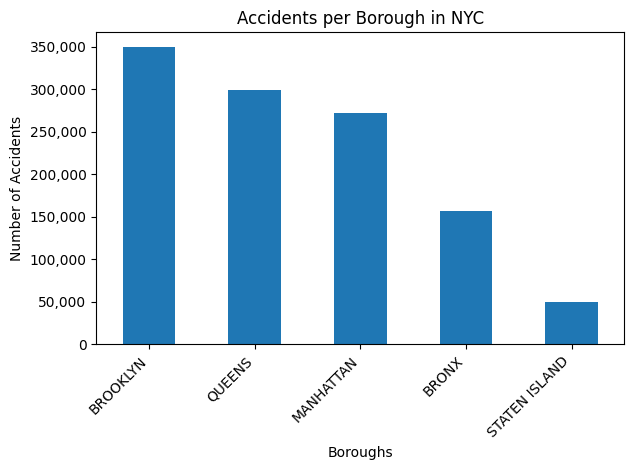

In [19]:
fifth_analysis = df.groupby('BOROUGH')['BOROUGH'].count().sort_values(ascending=False)

#
fifth_analysis.plot(kind="bar")

plt.xlabel('Boroughs')
plt.ylabel('Number of Accidents')
plt.title('Accidents per Borough in NYC')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

## 6. Most common accident locations

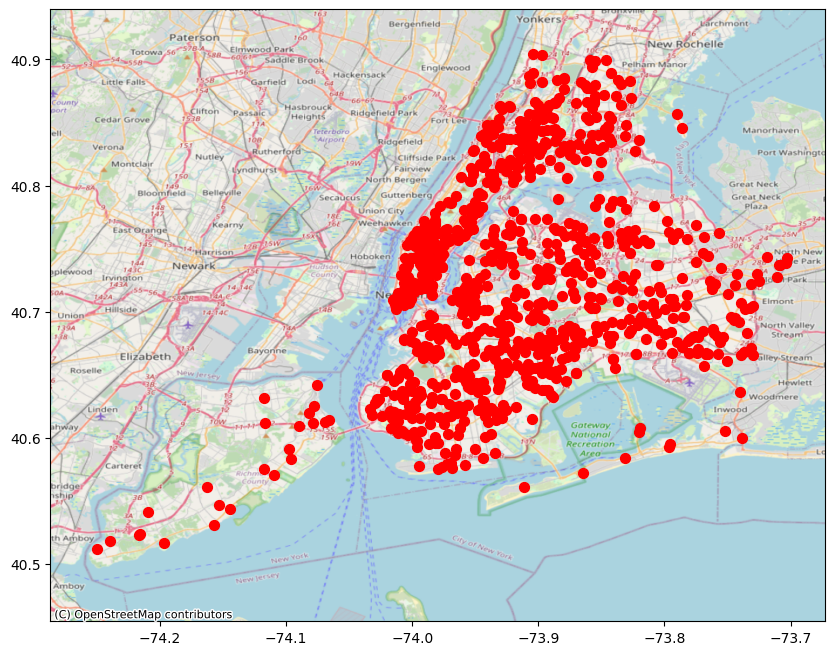

In [20]:
area = ox.geocode_to_gdf("New York City, NY")


df['long_lat_point'] = df.apply(lambda row: Point(row['LONGITUDE'],row['LATITUDE']), axis=1) 

df['is_NY'] = df['long_lat_point'].apply(lambda point: area.geometry.contains(point))
 
 
points_gdf = gpd.GeoSeries(df['long_lat_point'], crs="EPSG:4326")

 
ax = area.plot(figsize=(10, 10), facecolor='none', edgecolor='none')

# Plot the points on the same axis
points_gdf.head(1000).plot(ax=ax, marker='o', color='red', markersize=50)

# Adding a basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, crs=area.crs.to_string())

# Cluster points for better visualization
points_gdf = points_gdf.to_crs(epsg=3857)  # Ensure the CRS is web mercator for clustering
points_gdf = points_gdf.simplify(50)  # Simplify the points for clarity

# Plot the points with transparency to better visualize dense areas
points_gdf.plot(ax=ax, alpha=0.5)  # make the symbols flexible ,
plt.show()